In [36]:
%run Function_Master.ipynb 
%run Parameterization.ipynb

## Defining Parameterization and Initial Conditions

In [16]:
print_paramterization(param)

╒════════════════════════════════════════╤═══════════════╤═════════════════╤═══════════════╤══════════════════════╕
│ V_max = 1.4                            │ λ_P = 0.05    │ μ_V = 1.0       │ μ_P = 0.4     │ K_I = 1.0            │
├────────────────────────────────────────┼───────────────┼─────────────────┼───────────────┼──────────────────────┤
│ γ_Z = 0.4                              │ λ_Z = 0.05    │ μ_V_prime = 1.6 │ μ_delta = 0.4 │ K_h = 1.0            │
├────────────────────────────────────────┼───────────────┼─────────────────┼───────────────┼──────────────────────┤
│ φ = 110236.2205                        │ λ_Z_hat = 0.1 │ μ_u = 0.0       │ μ_g = 0.4     │ K_P = 2.8            │
├────────────────────────────────────────┼───────────────┼─────────────────┼───────────────┼──────────────────────┤
│ g = 1.4                                │ λ_E = 0.3     │ μ_r = 0.5       │ μ_Z = 0.4     │ I_0 = e - 1 = 1.7183 │
├────────────────────────────────────────┼───────────────┼──────────────

## Running and Sorting Simulations

In [52]:
"""
Defines certain criteria for the numerical integration scheme.

Individual tolerances are perscribed to each state based on knowledge of
their probable values.
"""
t_span = 500

# Total N span
points = 1000
N_t = np.logspace(-4, 1, points) * 2

max_step   = .1
method     = 'LSODA'
tolerances = [1e-8, 1e-8, 1e-12, 1e-8, 1e-8, 1e-10, 1e-10]

In [53]:
%%time

"""
This cell defines the level for which each state shall be initialized based
on a reasonable ratio of total nutrients as nutrients increase in the system.

Numerically integrating equations for each initial condition configuration. 
"""
sols = []

Nn_0 = 0.
Pi_0 = 0.
Vi_0 = 0.

for Nt in N_t:
    
    # Define Phytoplankton and Zooplankton as certain percentages
    Pu_0 = .1 * Nt  
    Z_0  = .2 * Nt 
    
    #Initial level of Ve is computed based on the ratio of hosts to viruses
    r = 1/10
    Ve_0 = est_viral_abund(r, Pu_0, alpha, beta, S_ind, V_ind)
    
    # Define nutrient level as the remainder
    Nr_0 = Nt - (Pu_0 + Z_0 + Ve_0)
    
    # Define initial condition array
    z0 = [Nn_0, Nr_0, Pu_0, Pi_0, Z_0, Vi_0, Ve_0]
    
    solution = solve_ivp(model, [0, t_span], z0, args=param,
                         max_step=max_step, method=method, atol=tolerances)     
    
    #returns list of initial conditions + solution object
    sols.append((z0, solution))

len(sols)

CPU times: user 33.1 s, sys: 710 ms, total: 33.8 s
Wall time: 34 s


1000

In [54]:
%store sols 

Stored 'sols' (list)


## Visualization of Results

In [38]:
%store -r sols

In [55]:
# Filtering solutions into different groups

ss_sols = []
osc_sols = []

for z0, sol in sols: 
    info = ss_or_osc(sol)
    
    if info == 'osc':
        osc_sols.append([z0, sol])
        
    else:
        ss_sols.append([z0, sol] + list(info))
        
print(f'Out of {len(sols)} solutions, {len(ss_sols)} are steady (or decay) and {len(osc_sols)} are oscillatory.')

Out of 1000 solutions, 905 are steady (or decay) and 95 are oscillatory.


In [49]:
N_T   = np.array([sum(z0) for z0, sol, ss, con_ind in ss_sols])
ss_Nn = np.array([ss[0] for z0, sol, ss, con_ind in ss_sols])
ss_Nr = np.array([ss[1] for z0, sol, ss, con_ind in ss_sols])
ss_Pu = np.array([ss[2] for z0, sol, ss, con_ind in ss_sols])
ss_Pi = np.array([ss[3] for z0, sol, ss, con_ind in ss_sols])
ss_Z  = np.array([ss[4] for z0, sol, ss, con_ind in ss_sols])
ss_Vi = np.array([ss[5] for z0, sol, ss, con_ind in ss_sols])
ss_Ve = np.array([ss[6] for z0, sol, ss, con_ind in ss_sols])

#### Cumulative Steady State Plots

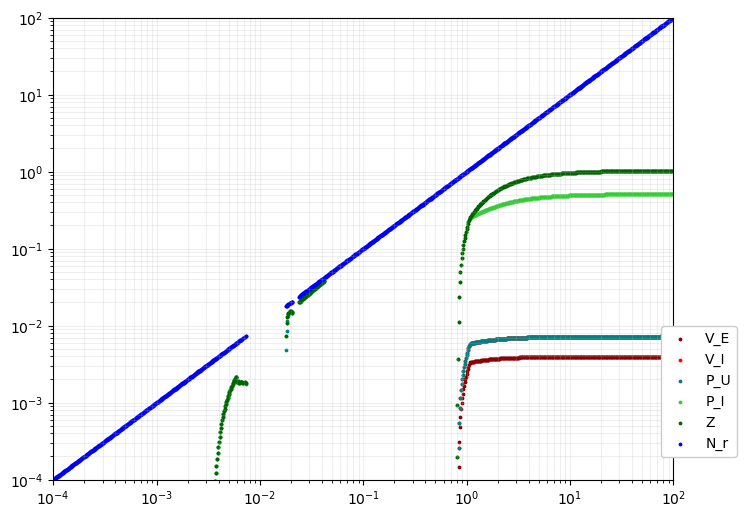

In [50]:
# FIX ME; UNDER CONSTRUCTION
%matplotlib inline

plt.figure(figsize=(8, 6))

# plt.plot(N_T, N_T, color='darkblue')
# plt.plot(N_T, ss_Ve, color='darkred', label='V_E')
# plt.plot(N_T, ss_Ve + ss_Vi , color='red', label='V_I')
# plt.plot(N_T, ss_Ve + ss_Vi + ss_Pu, color='teal', label='P_U')
# plt.plot(N_T, ss_Ve + ss_Vi + ss_Pu + ss_Pi, color='limegreen', label='P_I')
# plt.plot(N_T, ss_Ve + ss_Vi + ss_Pu + ss_Pi + ss_Z, color='darkgreen', label='Z')
# plt.plot(N_T, ss_Ve + ss_Vi + ss_Pu + ss_Pi + ss_Z + ss_Nr, color='blue', label='N_r')

plt.scatter(N_T, N_T, color='darkblue', s=3)
plt.scatter(N_T, ss_Ve, color='darkred', label='V_E', s=3)
plt.scatter(N_T, ss_Ve + ss_Vi , color='red', label='V_I', s=3)
plt.scatter(N_T, ss_Ve + ss_Vi + ss_Pu, color='teal', label='P_U', s=3)
plt.scatter(N_T, ss_Ve + ss_Vi + ss_Pu + ss_Pi, color='limegreen', label='P_I', s=3)
plt.scatter(N_T, ss_Ve + ss_Vi + ss_Pu + ss_Pi + ss_Z, color='darkgreen', label='Z', s=3)
plt.scatter(N_T, ss_Ve + ss_Vi + ss_Pu + ss_Pi + ss_Z + ss_Nr, color='blue', label='N_r', s=3)

#plt.xlim(-.5, 4.5) 

plt.xscale('log')
plt.xlim(1e-4, 100)

plt.yscale('log')
plt.ylim(1e-4, 100)

plt.legend(loc=(.98, 0.05), framealpha=1)
plt.grid(which='both', alpha=.2)
plt.show()

#### Annimation Block

In [34]:
#Parameters for printing in plot

param_labels_fp = ['V_max', 'γ_Z', 'φ', 'g', 'ν_x', 
               'λ_P', 'λ_Z', 'λ_Z_hat', 'λ_E', 'δ', 'μ_V', 'μ_V_prime', 'μ_u', 'μ_r', 'μ_s', 
               'μ_P', 'μ_delta', 'μ_g', 'μ_Z', 'K_N', 'K_I', 'K_h', 'K_P', 'I_0 = e - 1', 'ω']

param_fp = [f'{param_labels_fp[i]} = {param[i]:.4}' for i in range(len(param))]
param_fp = np.reshape(param_fp, (5,5)).transpose()

In [35]:
%matplotlib tk

""" Animation of sorted solutions. """

time = [(z0, solution.t) for z0, solution in sols]

Nn = [solution.y[0] for z0, solution in sols]
Nr = [solution.y[1] for z0, solution in sols]
PU = [solution.y[2] for z0, solution in sols]
PI = [solution.y[3] for z0, solution in sols]
Z  = [solution.y[4] for z0, solution in sols]        
VI = [solution.y[5] for z0, solution in sols]
VE = [solution.y[6] for z0, solution in sols]

states = [Nn, Nr, PU, PI, Z, VI, VE]

fig = plt.figure(1, figsize=(12, 15))
ax = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

def animate(i):
    ax.clear()
    ax2.clear()
    ax3.clear()
    
    for a in [ax, ax2]:
        a.plot(time[i][1], Nn[i], color="darkviolet", label = "N_n")
        a.plot(time[i][1], Nr[i], color="blue"      , label = "N_r")
        a.plot(time[i][1], PU[i], color="aquamarine", label = "P_U")
        a.plot(time[i][1], PI[i], color="limegreen" , label = "P_I")
        a.plot(time[i][1], Z[i], color="darkgreen" , label = "Z ")
        a.plot(time[i][1], VI[i], color="red"       , label = "V_I")
        a.plot(time[i][1], VE[i], color="darkred"   , label = "V_E")
    
        a.set(ylabel = r'Nutrients ($mmol/m^3$)')
        a.grid(which='both', alpha=.3)
        a.minorticks_on()
        a.legend(loc=(.98, 0.05), framealpha=1)
        
    title = (f'Total N: {sum(time[i][0]):.8}, '
             f'for Nr_0 = {time[i][0][1]:.4}, '
             f'Pu_0 = {time[i][0][2]:.4}, '
             f'Pi_0 = {time[i][0][3]:.4}, '
             f'Z_0 = {time[i][0][4]:.4}, '
             f'Vi_0 = {time[i][0][5]:.4}, '
             f'Ve_0 = {time[i][0][6]:.4}')

    ax.set_title(title, pad=15)

    ax2.set_xlabel('Time (Day)')
    ax2.set_yscale('log')
    ax2.set_ylim(1e-12, 3e1)
    
    ax3.text(0, -1.49, f"Number of simulations: {len(sols)}", weight='bold', transform=ax.transAxes)
    
    ax3.text(0,-1.58, 'Functional Calls:', weight='bold', transform=ax.transAxes)   
    ax3.text(0,-1.65, f"Integration Method: {method},", transform=ax.transAxes)
    ax3.text(.2, -1.65, f"Max time step: {max_step},", transform=ax.transAxes)
    ax3.text(.34, -1.65, f"Absolute state tolerances: {tolerances}", transform=ax.transAxes)

    ax3.text(0, -1.75, f"Final state values:", weight='bold', transform=ax.transAxes)
    
    ax3.text(0, -1.82, f"N_n:  {Nn[i][-1]},", transform=ax.transAxes)
    ax3.text(.25, -1.82, f"N_r:   {Nr[i][-1]},", transform=ax.transAxes)
    ax3.text(0, -1.9, f"P_U:  {PU[i][-1]},", transform=ax.transAxes)
    ax3.text(.25, -1.9, f"P_I:   {PI[i][-1]},", transform=ax.transAxes)
    ax3.text(0, -1.98, f"Z:     {Z[i][-1]},", transform=ax.transAxes)
    ax3.text(0, -2.06, f"V_I:   {VI[i][-1]},", transform=ax.transAxes)
    ax3.text(.25, -2.06, f"V_E:  {VE[i][-1]}", transform=ax.transAxes)
    
    ax3.text(0, -2.16, "Parameterization: ", weight='bold', transform=ax.transAxes)

    table = ax3.table(cellText=param_fp, bbox=[0, -.2, 1, .5], cellLoc='left')
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(.7, 2)
    
    ax3.get_xaxis().set_visible(False)
    ax3.get_yaxis().set_visible(False)
    ax3.spines['top'].set_visible(False)
    ax3.spines['right'].set_visible(False)
    ax3.spines['bottom'].set_visible(False)
    ax3.spines['left'].set_visible(False)

fig.tight_layout(pad=5)
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(sols))
plt.show()

#### File storage

In [2]:
%%time

""" File storage directly to specified directory; exporting as mp4. """;

# SET FILE NAME
# f = "/Users/jholmes/Desktop/NCAR/Simulation Annimations/Fixed Initial Condition Ratio/Base_Parameterization_variying_Nt.mp4"
# writermp4 = matplotlib.animation.FFMpegWriter(fps=60)
# ani.save(f, writer=writermp4)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs
